# Categorical Naive Bayes and Gaussian Naive Bayes for Weather Data Analysis



## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns

## Task 1

### Reading Dataset

- Dataset was first stored as a csv file manually from the given values in image format
- Then imported as a dataframe

In [3]:
df = pd.read_csv("weather.csv")

In [4]:
df

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


### Implementation of Naive Bayes Posterior Calculation Class

For ease of calculation at later stages and because of personal interest implemented the Naive Bayes posterior Calculation class.

- Class can calculate prior, likelihood and posterior, and also perform complete calculation uptil posterior with a single function.
- Class functionality was `verified by manual calculation`.

In [187]:
class NaiveBayesPosterior():
    def __init__(self, df, features, target, lam = 0):
        self.features = features
        self.target = target
        self.df = df
        self.prior = 0
        self.likelihood = {}
        self.posterior = 0
        self.lam = lam
        
    def calculate_prior(self):
        if (self.lam == 0):
            self.prior = self.df.groupby(self.target).size().div(len(self.df))
        else:
            size = self.df.groupby(self.target).size() + self.lam
            total = self.df.groupby(self.target).size().sum() + \
                self.lam * len(self.df.groupby(self.target).size().index)
            self.prior = size / total
        
    def calculate_likelihood(self):
        if (self.lam == 0):    
            for feature in self.features:
                self.likelihood[feature] = self.df.groupby([self.target,feature]).size().div(len(self.df)).div(self.prior)
        else:
            for feature in self.features:
                size = self.df.groupby([self.target,feature]).size() + self.lam
                count = len(self.df) + self.lam*(len(self.df.groupby(feature).size().index))
                self.likelihood[feature] = (size / count) / self.prior
        
            
    def calculate_posterior(self, values):
        self.post_calc = {}
        self.post_calc['Yes'] = self.likelihood[values[0][0]]['Yes'][values[0][1]] * \
            self.likelihood[values[1][0]]['Yes'][values[1][1]] * self.prior['Yes']
        
        self.post_calc['No'] = self.likelihood[values[0][0]]['No'][values[0][1]] * \
            self.likelihood[values[1][0]]['No'][values[1][1]] * self.prior['No']
        
        self.denominator_factor = self.post_calc['Yes'] + self.post_calc['No']
        
        self.posterior = self.post_calc[values[-1]] / self.denominator_factor
        
        return self.posterior
    
    def complete_calculation(self, values):
        self.calculate_prior()
        self.calculate_likelihood()
        self.calculate_posterior(values)

In [208]:
# Creating the object to be used later
# Passing second attribute of feature names and last one of target column name
customNB = NaiveBayesPosterior(df, df.columns[:-1],df.columns[-1])

### Part 1 - Verification of the filled table

- The required table was filled manually by looking at the dataset
- The probabilities calculated manually can be verified using this automated solution

In [209]:
customNB.df.head()

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes


In [210]:
# Calculating prior and likelihood
customNB.calculate_prior()
customNB.calculate_likelihood()

The table values can be verified by comparing `prior` and `likelihood` values below

In [212]:
customNB.prior

play
No     0.357143
Yes    0.642857
dtype: float64

In [115]:
customNB.likelihood

{'weather': play  weather 
 No    Rainy       0.176471
       Sunny       0.235294
 Yes   Overcast    0.294118
       Rainy       0.235294
       Sunny       0.176471
 dtype: float64,
 'temperature': play  temperature
 No    Cool           0.117647
       Hot            0.176471
       Mild           0.176471
 Yes   Cool           0.235294
       Hot            0.176471
       Mild           0.294118
 dtype: float64}

In [88]:
customNB.likelihood

{'weather': play  weather 
 No    Rainy       0.400000
       Sunny       0.600000
 Yes   Overcast    0.444444
       Rainy       0.333333
       Sunny       0.222222
 dtype: float64,
 'temperature': play  temperature
 No    Cool           0.200000
       Hot            0.400000
       Mild           0.400000
 Yes   Cool           0.333333
       Hot            0.222222
       Mild           0.444444
 dtype: float64}

### Part 2 - Posterior Calculation

- Posterior was first calculated manually and then using custom Naive Bayes class implemented above
- Results obtained were `verified` and turned out to be `consistent`

In [196]:
# The posterior calculation function takes input of a nested list of the following format
values = [['weather','Sunny'],['temperature','Hot'], 'Yes']

In [12]:
customNB.likelihood

{'weather': play  weather 
 No    Rainy       0.400000
       Sunny       0.600000
 Yes   Overcast    0.444444
       Rainy       0.333333
       Sunny       0.222222
 dtype: float64,
 'temperature': play  temperature
 No    Cool           0.200000
       Hot            0.400000
       Mild           0.400000
 Yes   Cool           0.333333
       Hot            0.222222
       Mild           0.444444
 dtype: float64}

In [13]:
# Calculating posterior of Play='Yes' contioned on weather = "Sunny" and Temperature = "Hot"
customNB.complete_calculation(values)

The required **Posterior** is:

In [206]:
print("The value of posterior is {}".format(customNB.posterior))

The value of posterior is 0.31034482758620685


### Part 3 - Posterior Calculation with Smoothing

Implementation for calculation of posterior using given values of `lambda` was also added to the custom Naive Bayes implementation

In [199]:
# Last parameter is value of lambda
customNB = NaiveBayesPosterior(df, df.columns[:-1],df.columns[-1],1)

In [200]:
# Calculating prior and likelihood
customNB.calculate_prior()
customNB.calculate_likelihood()

In [201]:
values = [['weather','Sunny'],['temperature','Hot'], 'Yes']

In [202]:
customNB.complete_calculation(values)

The required value of `posterior` with `lambda=1` is:

In [207]:
print("The value of posterior is {}".format(customNB.posterior))

The value of posterior is 0.31034482758620685


### Part 4

#### Calculations of Posterior with smoothing parameters

In [246]:
customNB = NaiveBayesPosterior(df, df.columns[:-1],df.columns[-1],0)
customNB.calculate_prior()
customNB.calculate_likelihood()
customNB.complete_calculation(values)
print("The value of posterior for lambda= 0 is {}".format(customNB.posterior))

The value of posterior for lambda= 0 is 0.2702702702702703


In [247]:
customNB = NaiveBayesPosterior(df, df.columns[:-1],df.columns[-1],1)
customNB.calculate_prior()
customNB.calculate_likelihood()
customNB.complete_calculation(values)
print("The value of posterior for lambda= 1 is {}".format(customNB.posterior))

The value of posterior for lambda= 1 is 0.31034482758620685


#### Encoding the Dataset with Ordinal Encoder

In [248]:
enc = OrdinalEncoder()

In [249]:
enc = enc.fit(df)

In [250]:
enc.categories_

[array(['Overcast', 'Rainy', 'Sunny'], dtype=object),
 array(['Cool', 'Hot', 'Mild'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [251]:
df_encoded = pd.DataFrame(enc.transform(df))
df_encoded.columns = df.columns
df_encoded

,weather,temperature,play
0,2.0,1.0,0.0
1,2.0,1.0,0.0
2,0.0,1.0,1.0
3,1.0,2.0,1.0
4,1.0,0.0,1.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,2.0,2.0,0.0
8,2.0,0.0,1.0
9,1.0,2.0,1.0


In [252]:
X = df_encoded.iloc[:,0:2]
y = df_encoded.iloc[:,-1]
y

0     0.0
1     0.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    0.0
Name: play, dtype: float64

In [253]:
enc.categories_[2][0]

'No'

In [283]:
encoded = enc.transform(df)
X = encoded[:,0:2]
y = encoded[:,-1]
encoded

array([[2., 1., 0.],
       [2., 1., 0.],
       [0., 1., 1.],
       [1., 2., 1.],
       [1., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [2., 2., 0.],
       [2., 0., 1.],
       [1., 2., 1.],
       [2., 2., 1.],
       [0., 2., 1.],
       [0., 1., 1.],
       [1., 2., 0.]])

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [291]:
X_train

array([[1., 2.],
       [0., 1.],
       [0., 2.],
       [1., 0.],
       [0., 0.],
       [2., 1.],
       [2., 1.],
       [1., 2.],
       [2., 2.],
       [2., 2.],
       [1., 2.]])

#### Building the classifier

First calculating with alpha (lambda) = 0

In [292]:
cnb = CategoricalNB(alpha=0)

In [293]:
cnb

CategoricalNB(alpha=0)

In [294]:
cnb = cnb.fit(X_train,y_train)

C:\Users\erudi\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [295]:
predictions = cnb.predict(X_train)
predictions

array([1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.])

In [298]:
y_train_pred = [enc.categories_[2][int(y)] for y in predictions]
y_train_orig = [enc.categories_[2][int(y)] for y in y_train]
y_train_pred

['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes']

In [304]:
print("The accuracy value when lambda = 0 on train set is {}".format(accuracy_score(y_train_orig,y_train_pred)))

The accuracy value when lambda = 0 on train set is 0.8181818181818182


In [305]:
predictions = cnb.predict(X_test)
predictions

array([0., 0., 1.])

In [306]:
y_test_pred = [enc.categories_[2][int(y)] for y in predictions]
y_test_orig = [enc.categories_[2][int(y)] for y in y_test]
y_test_pred

['No', 'No', 'Yes']

In [307]:
print("The accuracy value when lambda = 0 on train set is {}".format(accuracy_score(y_test_orig,y_test_pred)))

The accuracy value when lambda = 0 on train set is 0.3333333333333333


Building classifier with alpha (lambda) = 1

In [308]:
cnb = CategoricalNB(alpha=1)

In [311]:
cnb = cnb.fit(X_train,y_train)

In [312]:
predictions = cnb.predict(X_train)
predictions

array([1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1.])

In [313]:
y_train_pred = [enc.categories_[2][int(y)] for y in predictions]
y_train_orig = [enc.categories_[2][int(y)] for y in y_train]
y_train_pred

['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes']

In [314]:
print("The accuracy value when lambda = 0 on train set is {}".format(accuracy_score(y_train_orig,y_train_pred)))

The accuracy value when lambda = 0 on train set is 0.8181818181818182


In [315]:
predictions = cnb.predict(X_test)
predictions

array([0., 0., 1.])

In [316]:
y_test_pred = [enc.categories_[2][int(y)] for y in predictions]
y_test_orig = [enc.categories_[2][int(y)] for y in y_test]
y_test_pred

['No', 'No', 'Yes']

In [317]:
print("The accuracy value when lambda = 0 on train set is {}".format(accuracy_score(y_test_orig,y_test_pred)))

The accuracy value when lambda = 0 on train set is 0.3333333333333333


## Task 2

### Reading Data

In [32]:
df = pd.read_csv("2_analcatdata_broadway.csv", sep=";")
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att16,att17,att18,att19,att20,att21,att22,att23,att24,label
0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.000000,-0.166665,0.599889,0
1,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-0.666665,-0.500000,0.956251,0
2,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.833335,-0.333335,0.636162,1
3,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.333335,0.833335,0.074069,0
4,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,0.333335,0.833335,0.699294,0


### Data Encoding

Initially, it looked like that encoding was not required as data appears to be in required format, but the classifier generates an error when negative values are passed. Therefore, it has to be processed.

In [33]:
enc = OrdinalEncoder()

In [34]:
enc.fit(df)

OrdinalEncoder()

In [35]:
enc.categories_

[array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.,  1.]),
 array([-1.        , -0.833335  , -0.666665  , -0.5       , -0.333335  ,
        -0.166665  , -0.01612871,  0.        ,  0.166665  ,  0.333335  ,
         0.5       ,  0.666665  ,  0.833335  ,  1.        ]),
 array([-1.      , -0.833335, -0.666665, -0.5     , -0.333335, -0.166665,
         0.      ,  0.085145,  0.166665,  0.333335,  0.5     ,  0.666665,
         0.833335,  1.      ]),
 array([-1.        , -0.9590198 , -0.85075453, -0.70400111, -0.68683373,
        -0.64059255, -0.59213623, -0.51820573, -0.51349855, -0.47307213,
        -0.44482902, -0.42544649, -0.40717154,

In [36]:
df_t = enc.transform(df)
df_t = pd.DataFrame(df_t)
df_t.columns = df.columns
df_t

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att16,att17,att18,att19,att20,att21,att22,att23,att24,label
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,13.0,5.0,56.0,0.0
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,89.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,12.0,4.0,61.0,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,12.0,28.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9.0,12.0,66.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,11.0,42.0,0.0
91,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,7.0,13.0,86.0,0.0
92,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,74.0,0.0
93,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,14.0,0.0


### Seperating and Splitting

First seperating the dataset into features and labels and then splitting them into 20% test and 80% train datasets

In [37]:
# Separating features and labels
X = df_t.loc[:,df_t.columns!="label"]
y = df_t["label"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [39]:
X_test

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24
85,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,2.0,39.0
26,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,8.0,7.0
58,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,81.0
46,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,3.0,51.0
37,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,16.0
73,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,9.0,44.0
75,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,3.0,6.0
87,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,12.0,69.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,4.0,61.0
48,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,13.0,67.0


### Building the Classifier and doing a test run

In [40]:
cnb = CategoricalNB()

In [41]:
cnb.fit(X_train, y_train)

CategoricalNB()

In [42]:
# Predicting on train data
predictions = cnb.predict(X_train)
predictions

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 4.,
       1., 0., 0., 0., 4., 0., 0., 2., 0., 0., 0., 0., 0., 4., 0., 4., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 1.,
       2., 0., 0., 0., 1., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 2.,
       2., 0., 0., 2., 0., 1., 3., 0.])

In [43]:
# Transforming back to original values (Doing manual, selective inverse transform from encoder)
y_pred = [enc.categories_[-1][int(y)] for y in predictions]
y_true = [enc.categories_[-1][int(y)] for y in y_train]


In [45]:
X_train

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24
92,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,74.0
35,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,5.0,65.0
22,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
88,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,13.0,18.0
10,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,9.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,12.0,64.0
51,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,59.0
44,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,8.0,77.0
21,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,10.0,84.0


In [46]:
predicion_array = {'train_acc':[], 'test_acc':[], 'train_error':[], 'test_error':[]}
for i in range(50+1):
    cnb = CategoricalNB(alpha=i)
    cnb.fit(X_train, y_train)
    train_pred = cnb.predict(X_train)
    test_pred = cnb.predict(X_test)
    y_train_pred = [enc.categories_[-1][int(y)] for y in train_pred]
    y_test_pred = [enc.categories_[-1][int(y)] for y in test_pred]
    y_train_true = [enc.categories_[-1][int(y)] for y in y_train]
    y_test_true = [enc.categories_[-1][int(y)] for y in y_test]
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    test_accuracy = accuracy_score(y_test_true, y_test_pred)
    predicion_array['train_acc'].append(train_accuracy)
    predicion_array['test_acc'].append(test_accuracy)
    predicion_array['train_error'].append(1 - train_accuracy)
    predicion_array['test_error'].append(1 - test_accuracy)

C:\Users\erudi\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [47]:
predicion_array

{'train_acc': [1.0,
  1.0,
  1.0,
  0.9736842105263158,
  0.9736842105263158,
  0.9736842105263158,
  0.9342105263157895,
  0.9078947368421053,
  0.8947368421052632,
  0.8947368421052632,
  0.8421052631578947,
  0.8157894736842105,
  0.7763157894736842,
  0.7631578947368421,
  0.75,
  0.7368421052631579,
  0.7236842105263158,
  0.7236842105263158,
  0.7236842105263158,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.7105263157894737,
  0.71052631

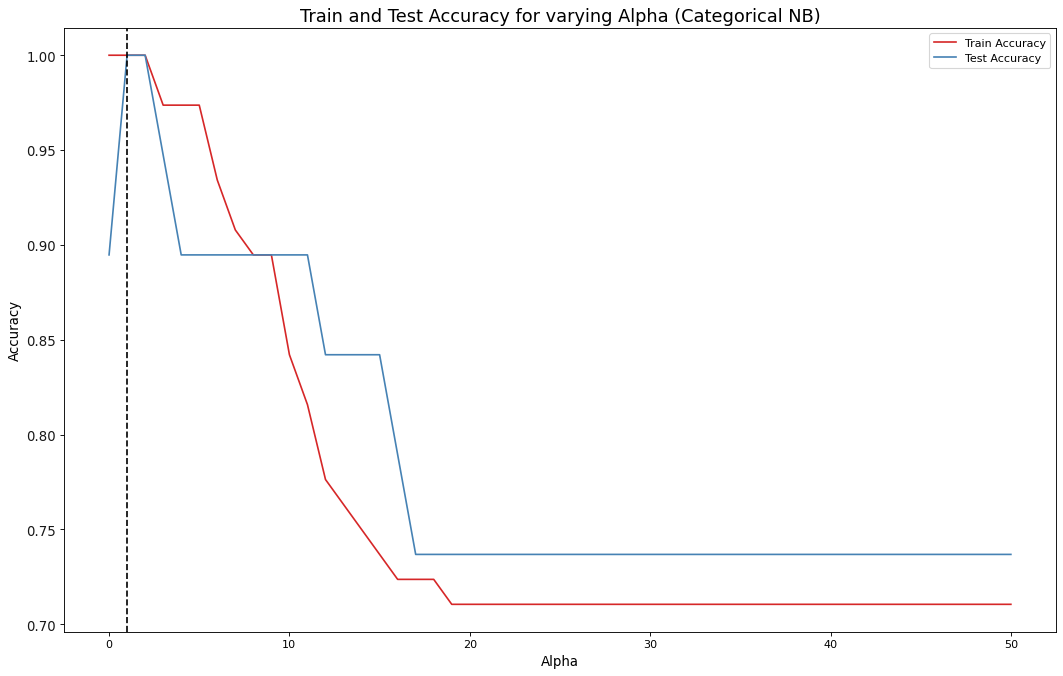

In [60]:
x_axis = [x for x in range(51)]
plt.figure(figsize=(16,10), dpi= 80)
no_of_features = list(range(1,len(X.columns)+1))
plt.plot(x_axis, predicion_array['train_acc'], color='tab:red', label='Train Accuracy')
plt.plot(x_axis, predicion_array['test_acc'], color="steelblue", label='Test Accuracy')
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Alpha", fontsize=12)
plt.yticks(fontsize=12, alpha=.9)
plt.title("Train and Test Accuracy for varying Alpha (Categorical NB)", fontsize=16)
plt.axvline(1,ls='--', color='black')
plt.legend()
plt.show()

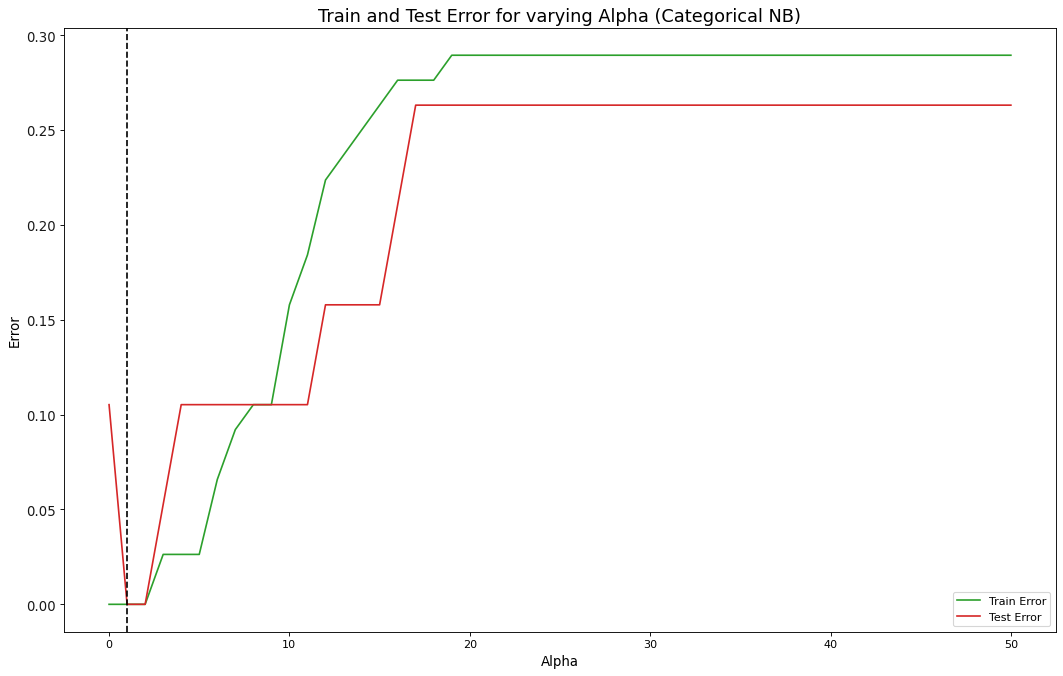

In [58]:
x_axis = [x for x in range(51)]
plt.figure(figsize=(16,10), dpi= 80)
no_of_features = list(range(1,len(X.columns)+1))
plt.plot(x_axis, predicion_array['train_error'], color='tab:green', label='Train Error')
plt.plot(x_axis, predicion_array['test_error'], color="tab:red", label='Test Error')
plt.ylabel("Error", fontsize=12)
plt.xlabel("Alpha", fontsize=12)
plt.yticks(fontsize=12, alpha=.9)
plt.title("Train and Test Error for varying Alpha (Categorical NB)", fontsize=16)
plt.axvline(1,ls='--', color='black')
plt.legend()
plt.show()

**Observations**

Looking at the results, increasing the alpha starts an immediate decline in train accurancy, but it still does not improve the test accuracy and that too starts to drop as the alpha increases. For this dataset, keeping small alpha value would be more favorable.

### Best Value of Smoothing Parameter - Lambda (alpha)

For the given dataset, it can be observed from both the `accuracy` and `error` plots, that the best value of smoothing parameter is `1` as it is giving minimum error, which is shown using black dotted line on the graphs.

## Task 3 - Gaussian Naïve Bayes

### Importing Dataset

In [111]:
breast_cancer = datasets.load_breast_cancer()

In [117]:
breast_cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [135]:
c_df = pd.DataFrame(data = breast_cancer['data'], 
                    columns = breast_cancer['feature_names'])
c_df['target'] = breast_cancer['target']

In [136]:
c_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Visualizing the Dataset Features Correlation

In [140]:
# Looking at correlation among the dataset features
corr = c_df.corr()
corr.shape

(31, 31)

**Do not run again, takes times to generate the visualization**

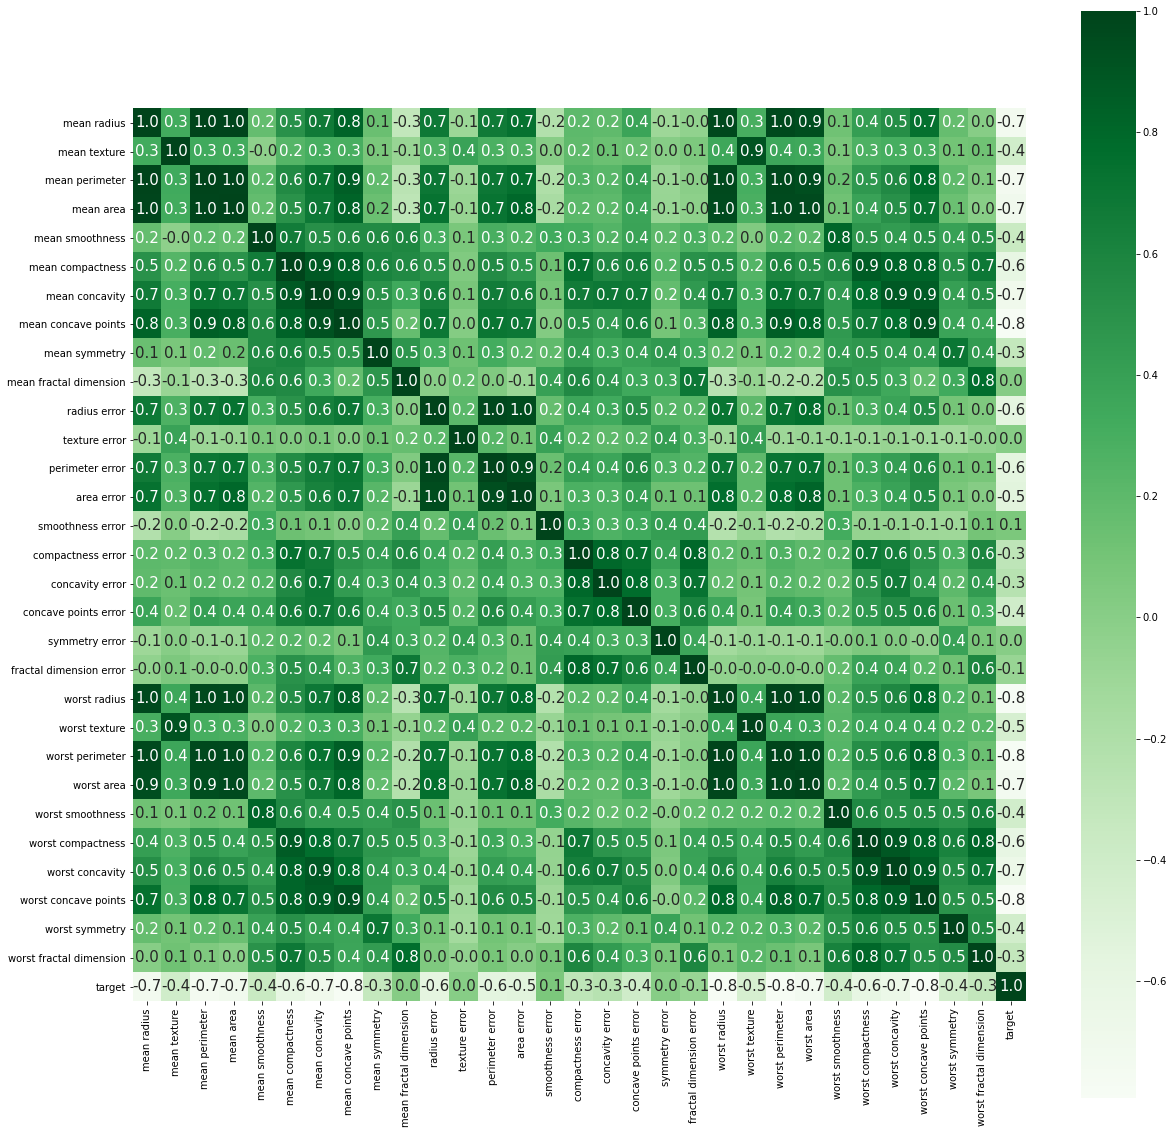

In [141]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [145]:
c_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [147]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

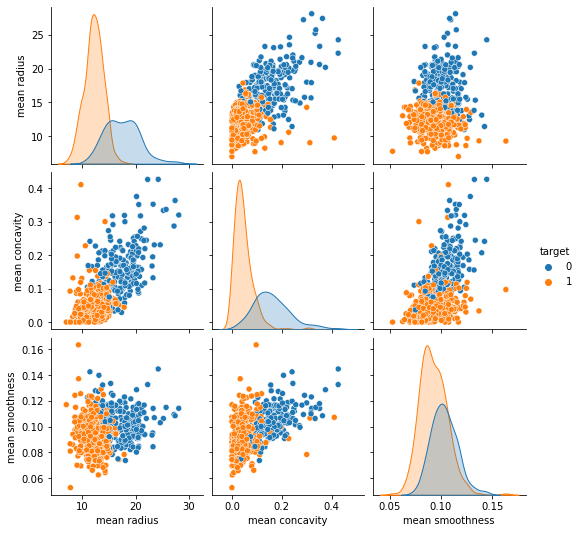

In [148]:
# 0 means malignant and 1 means benign
sns.pairplot(c_df, hue="target", vars = ["mean radius", "mean concavity", "mean smoothness"])
plt.show()

### Separating and splitting dataset

In [152]:
# Separating features and labels
X = c_df.loc[:,c_df.columns!="target"]
y = c_df["target"]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Building the Classifier

In [149]:
gnb = GaussianNB()

In [154]:
gnb.fit(X_train, y_train)

GaussianNB()

In [156]:
y_pred = gnb.predict(X_train)

In [158]:
accuracy_score(y_pred, y_train)

0.9406593406593406

### Hyperparameter Tuning

First doing manual hyperparameter tuning by visualizing the results, and later trying out automatic options to compare the results

- The hyperparameter `var_smoothing` of GuassianNB will be optimized.
- The range was chosen by studying work of [EloquentML](https://eloquentarduino.github.io/2020/08/eloquentml-grows-its-family-of-classifiers-gaussian-naive-bayes-on-arduino/)

In [164]:
predicion_array = {'train_acc':[], 'test_acc':[], 'train_error':[], 'test_error':[]}
for i in range(-7,1):
    gnb = GaussianNB(var_smoothing=pow(10, i))
    gnb.fit(X_train, y_train)
    train_pred = gnb.predict(X_train)
    test_pred = gnb.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    predicion_array['train_acc'].append(train_accuracy)
    predicion_array['test_acc'].append(test_accuracy)
    predicion_array['train_error'].append(1 - train_accuracy)
    predicion_array['test_error'].append(1 - test_accuracy)

In [165]:
predicion_array

{'train_acc': [0.9340659340659341,
  0.9274725274725275,
  0.9274725274725275,
  0.9208791208791208,
  0.9142857142857143,
  0.9076923076923077,
  0.8901098901098901,
  0.8197802197802198],
 'test_acc': [0.9210526315789473,
  0.9122807017543859,
  0.9035087719298246,
  0.9035087719298246,
  0.9035087719298246,
  0.8947368421052632,
  0.868421052631579,
  0.8421052631578947],
 'train_error': [0.06593406593406592,
  0.07252747252747249,
  0.07252747252747249,
  0.07912087912087917,
  0.08571428571428574,
  0.09230769230769231,
  0.10989010989010994,
  0.18021978021978025],
 'test_error': [0.07894736842105265,
  0.08771929824561409,
  0.0964912280701754,
  0.0964912280701754,
  0.0964912280701754,
  0.10526315789473684,
  0.13157894736842102,
  0.1578947368421053]}

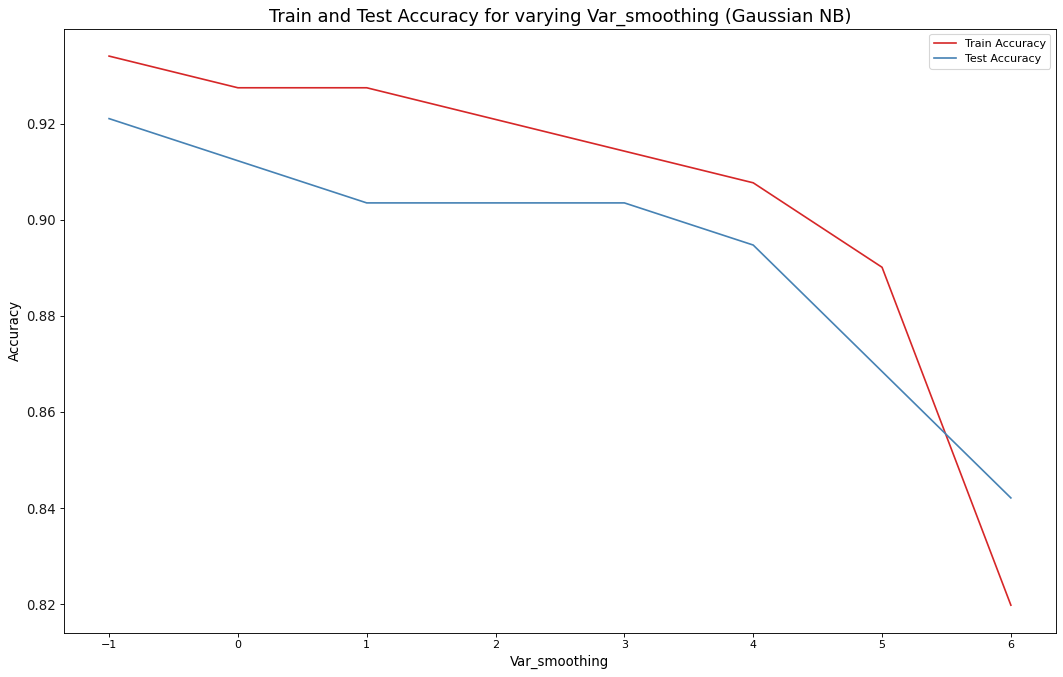

In [166]:
x_axis = [x for x in range(-1,7)]
plt.figure(figsize=(16,10), dpi= 80)
no_of_features = list(range(1,len(X.columns)+1))
plt.plot(x_axis, predicion_array['train_acc'], color='tab:red', label='Train Accuracy')
plt.plot(x_axis, predicion_array['test_acc'], color="steelblue", label='Test Accuracy')
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Var_smoothing", fontsize=12)
plt.yticks(fontsize=12, alpha=.9)
plt.title("Train and Test Accuracy for varying Var_smoothing (Gaussian NB)", fontsize=16)
plt.legend()
plt.show()

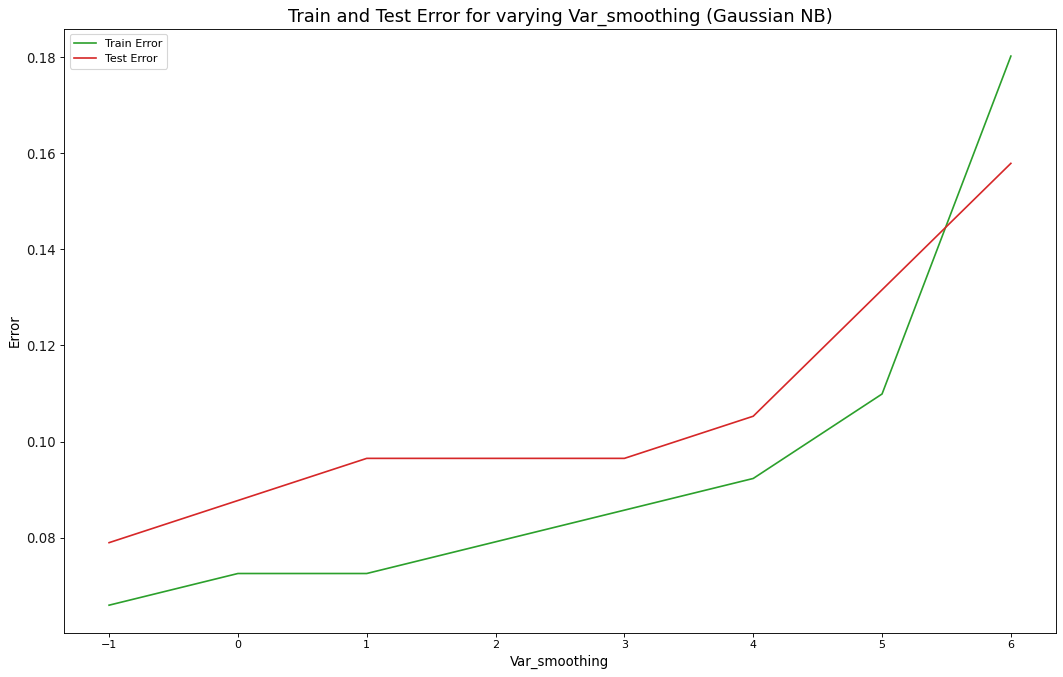

In [168]:
x_axis = [x for x in range(-1,7)]
plt.figure(figsize=(16,10), dpi= 80)
no_of_features = list(range(1,len(X.columns)+1))
plt.plot(x_axis, predicion_array['train_error'], color='tab:green', label='Train Error')
plt.plot(x_axis, predicion_array['test_error'], color="tab:red", label='Test Error')
plt.ylabel("Error", fontsize=12)
plt.xlabel("Var_smoothing", fontsize=12)
plt.yticks(fontsize=12, alpha=.9)
plt.title("Train and Test Error for varying Var_smoothing (Gaussian NB)", fontsize=16)
plt.legend()
plt.show()